
Class Frequency:
 Classes
A    151
B    123
C     68
Name: count, dtype: int64

Data Description:
        Feature 1   Feature 2   Feature 3    Feature 4
count  342.000000  342.000000  342.000000   342.000000
mean    43.921930   17.151170  200.915205  4201.754386
std      5.459584    1.974793   14.061714   801.954536
min     32.100000   13.100000  172.000000  2700.000000
25%     39.225000   15.600000  190.000000  3550.000000
50%     44.450000   17.300000  197.000000  4050.000000
75%     48.500000   18.700000  213.000000  4750.000000
max     59.600000   21.500000  231.000000  6300.000000

Interquartile Range (IQR):
 Feature 1       9.275
Feature 2       3.100
Feature 3      23.000
Feature 4    1200.000
dtype: float64


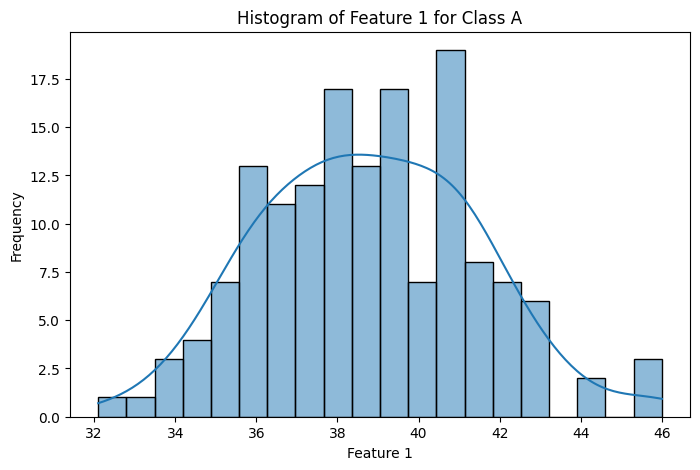

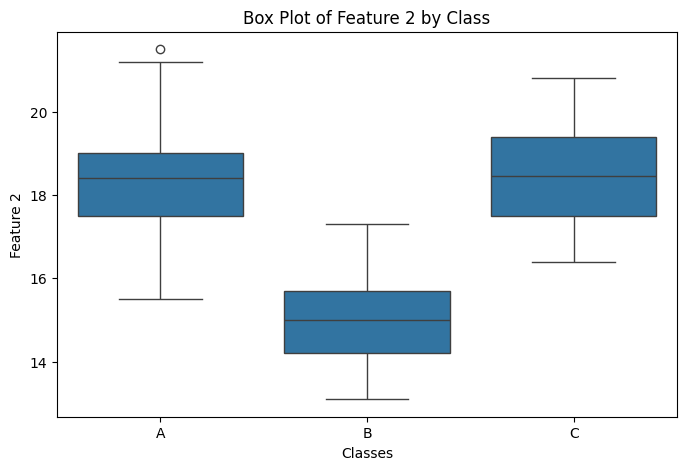

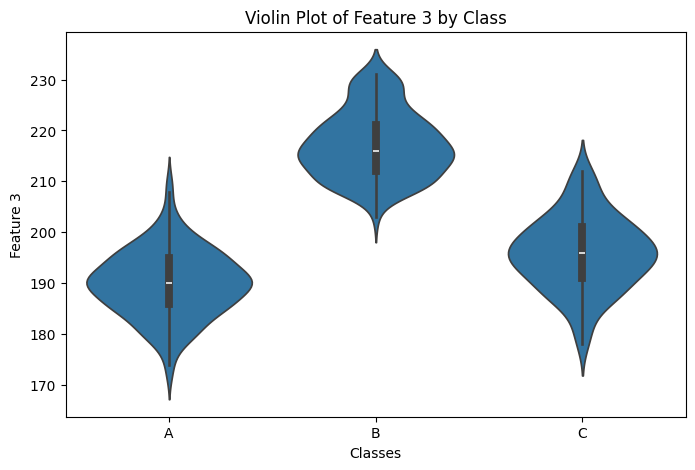

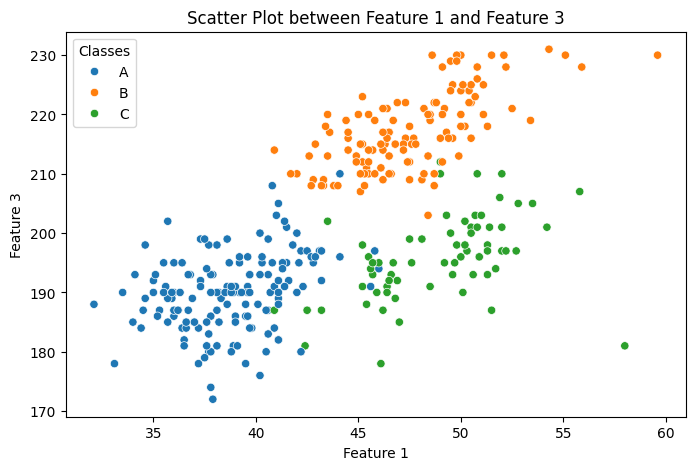

<ipython-input-10-657ae7a9feaf>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


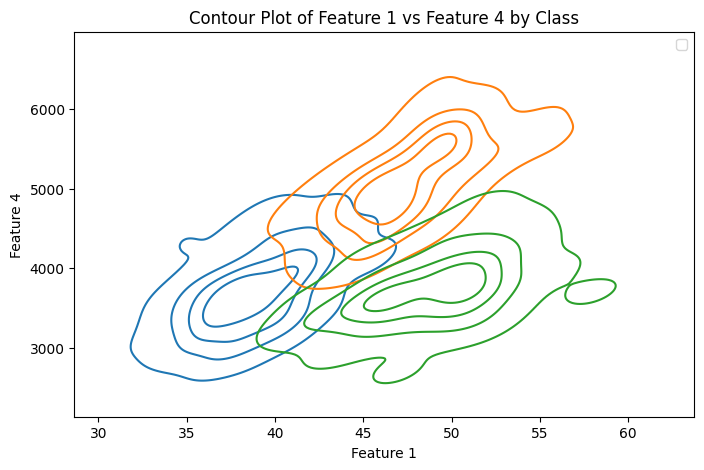

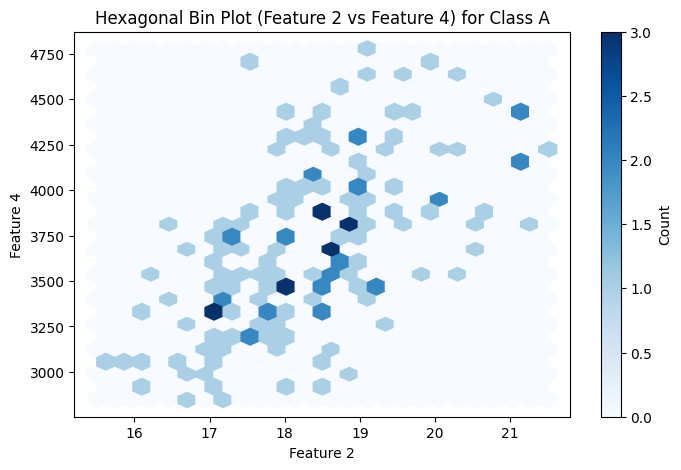

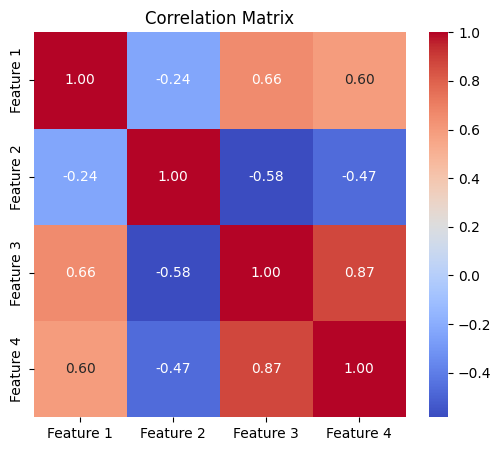

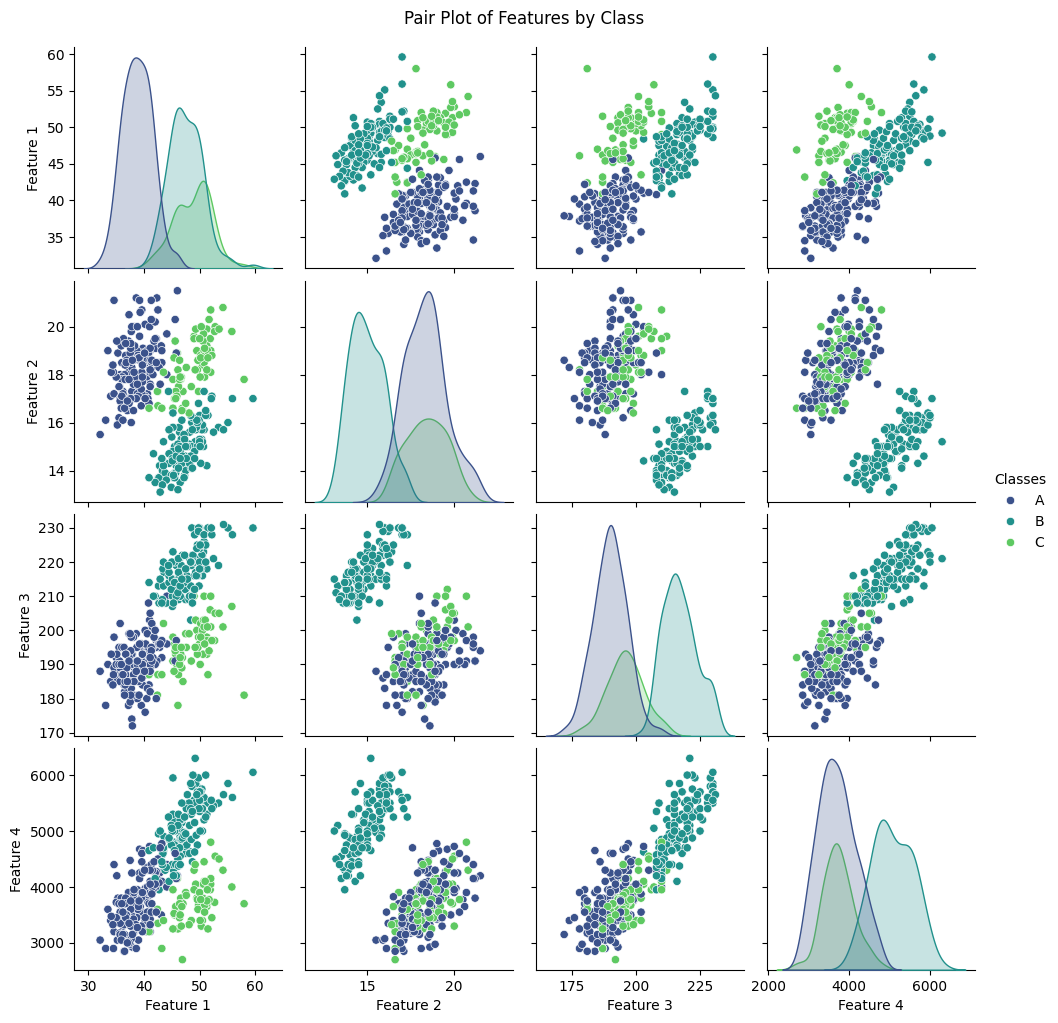

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "A1.csv"
df = pd.read_csv(file_path)

# Convert numerical columns explicitly to float and handle non-numeric values
df[["Feature 1", "Feature 2", "Feature 3", "Feature 4"]] = df[["Feature 1", "Feature 2", "Feature 3", "Feature 4"]].apply(pd.to_numeric, errors="coerce")

# a. Find the frequency of samples for each class
class_counts = df["Classes"].value_counts()
print("\nClass Frequency:\n", class_counts)

# b. Generate data description and calculate the interquartile range (IQR)
desc = df.iloc[:, 2:6].describe()
print("\nData Description:")
print(df[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].describe())
iqr = desc.loc["75%"] - desc.loc["25%"]
print("\nInterquartile Range (IQR):\n", iqr)

# c. Histogram of Feature 1 for Class A
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Classes"] == "A"]["Feature 1"], bins=20, kde=True)
plt.title("Histogram of Feature 1 for Class A")
plt.xlabel("Feature 1")
plt.ylabel("Frequency")
plt.show()

# d. Box plot of Feature 2 for each class separately
plt.figure(figsize=(8, 5))
sns.boxplot(x="Classes", y="Feature 2", data=df)
plt.title("Box Plot of Feature 2 by Class")
plt.show()

# e. Violin plot of Feature 3 for each class separately
plt.figure(figsize=(8, 5))
sns.violinplot(x="Classes", y="Feature 3", data=df)
plt.title("Violin Plot of Feature 3 by Class")
plt.show()

# f. Scatter plot between Feature 1 and Feature 3 by class
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Feature 1", y="Feature 3", hue="Classes", data=df)
plt.title("Scatter Plot between Feature 1 and Feature 3")
plt.show()

# g. Contour plot between Feature 1 and Feature 4 by class
plt.figure(figsize=(8, 5))
for class_label in df["Classes"].unique():
    subset = df[df["Classes"] == class_label]
    sns.kdeplot(x=subset["Feature 1"], y=subset["Feature 4"], levels=5, label=class_label)
plt.title("Contour Plot of Feature 1 vs Feature 4 by Class")
plt.legend()
plt.show()

# h. Hexagonal bin plot for Class A between Feature 2 and Feature 4
plt.figure(figsize=(8, 5))
subset_A = df[df["Classes"] == "A"]
hb = plt.hexbin(subset_A["Feature 2"], subset_A["Feature 4"], gridsize=25, cmap="Blues")
plt.colorbar(hb, label="Count")
plt.title("Hexagonal Bin Plot (Feature 2 vs Feature 4) for Class A")
plt.xlabel("Feature 2")
plt.ylabel("Feature 4")
plt.show()

# i. Correlation matrix for the four features
plt.figure(figsize=(6, 5))
sns.heatmap(df.iloc[:, 2:6].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# j. Pair plot for the four features showing classes separately
sns.pairplot(df, vars=["Feature 1", "Feature 2", "Feature 3", "Feature 4"], hue="Classes",palette='viridis', diag_kind="kde")
plt.suptitle('Pair Plot of Features by Class', y=1.02)
plt.show()
